IMPORTING LIBRARIES

In [234]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt


In [235]:
dataset  = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:,-1].values
print(x)
print(y)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


MAKE THE Y AS 2 DIMENSIONAL ARRAY

In [236]:
y = y.reshape(len(y),1)
'''requirements are
 we have to have no of rows equal to the no of elements in the arrya
 so we use len(y) which says that we have top have no of row equal to the length of y
  adn then we have to have  one column so we are having 1 there
'''
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [237]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scy = StandardScaler()
x = sc.fit_transform(x)
y = scy.fit_transform(y)

'''
here we are using different  object for thar starndard scaler
'''

print("AFTER FEATURE SCALING")
print(x)
print(y)

AFTER FEATURE SCALING
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


TRAIN THE MODEL

In [2]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)
#regressor.fit(sc.inverse_transform(x),scy.inverse_transform(y))

'''before predicting we have to rescale it  and then do it to get the value we are 
expecting to get'''



NameError: name 'x' is not defined

In [239]:
'''REVERSE SCALING'''

y_pred = scy.inverse_transform(regressor.predict(x).reshape(-1,1))

print(y_pred)

[[ 73474.15615697]
 [ 70786.94584626]
 [ 88213.00902103]
 [108254.98574956]
 [122574.52250599]
 [145503.10688572]
 [209410.23132923]
 [330606.89204569]
 [471671.95587315]
 [557821.75899897]]


In [240]:
from sklearn.metrics import r2_score,roc_auc_score
print(r2_score(y_pred,y))


-1.7044443205621485


VISUALIZING THE SVR MODEL

[[1. ]
 [1.1]
 [1.2]
 [1.3]
 [1.4]
 [1.5]
 [1.6]
 [1.7]
 [1.8]
 [1.9]
 [2. ]
 [2.1]
 [2.2]
 [2.3]
 [2.4]
 [2.5]
 [2.6]
 [2.7]
 [2.8]
 [2.9]
 [3. ]
 [3.1]
 [3.2]
 [3.3]
 [3.4]
 [3.5]
 [3.6]
 [3.7]
 [3.8]
 [3.9]
 [4. ]
 [4.1]
 [4.2]
 [4.3]
 [4.4]
 [4.5]
 [4.6]
 [4.7]
 [4.8]
 [4.9]
 [5. ]
 [5.1]
 [5.2]
 [5.3]
 [5.4]
 [5.5]
 [5.6]
 [5.7]
 [5.8]
 [5.9]
 [6. ]
 [6.1]
 [6.2]
 [6.3]
 [6.4]
 [6.5]
 [6.6]
 [6.7]
 [6.8]
 [6.9]
 [7. ]
 [7.1]
 [7.2]
 [7.3]
 [7.4]
 [7.5]
 [7.6]
 [7.7]
 [7.8]
 [7.9]
 [8. ]
 [8.1]
 [8.2]
 [8.3]
 [8.4]
 [8.5]
 [8.6]
 [8.7]
 [8.8]
 [8.9]
 [9. ]
 [9.1]
 [9.2]
 [9.3]
 [9.4]
 [9.5]
 [9.6]
 [9.7]
 [9.8]
 [9.9]]
[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[[ 73474.15615697]
 [ 70786.94584626]
 [ 88213.00902103]
 [108254.98574956]
 [122574.52250599]
 [145503.10688572]
 [209410.23132923]
 [330606.89204569]
 [471671.95587315]
 [557821.75899897]]


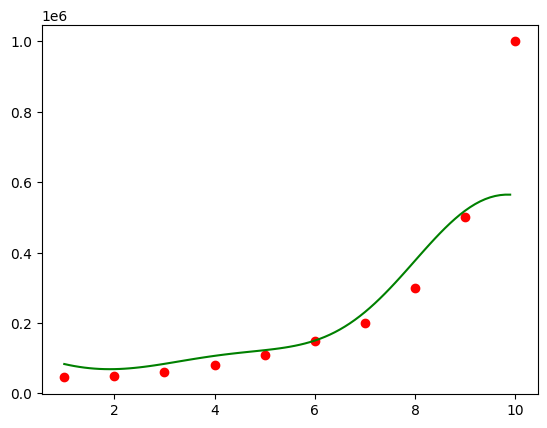

In [241]:
x_grid = np.arange(min(sc.inverse_transform(x)),max(sc.inverse_transform(x)),0.1)
x_grid = x_grid.reshape(len(x_grid),1)




plt.scatter(sc.inverse_transform(x),scy.inverse_transform(y),color = 'red')
print(sc.inverse_transform(x))
print(scy.inverse_transform(regressor.predict(x).reshape(-1,1)))
plt.plot(x_grid,scy.inverse_transform(regressor.predict(sc.fit_transform(x_grid)).reshape(-1,1)),color = 'green')
plt.show()